In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading boston house price dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

/home/mugunth/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df["house_price"] = boston.target

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

In [10]:
#get the statistical information about the complete datasets
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
#we will check any null values the dataset contains
df.isnull().sum()

CRIM           0
ZN             0
INDUS          0
CHAS           0
NOX            0
RM             0
AGE            0
DIS            0
RAD            0
TAX            0
PTRATIO        0
B              0
LSTAT          0
house_price    0
dtype: int64

In [12]:
#we will see the co-relation for the better analysis of choosing the model selection
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,house_price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


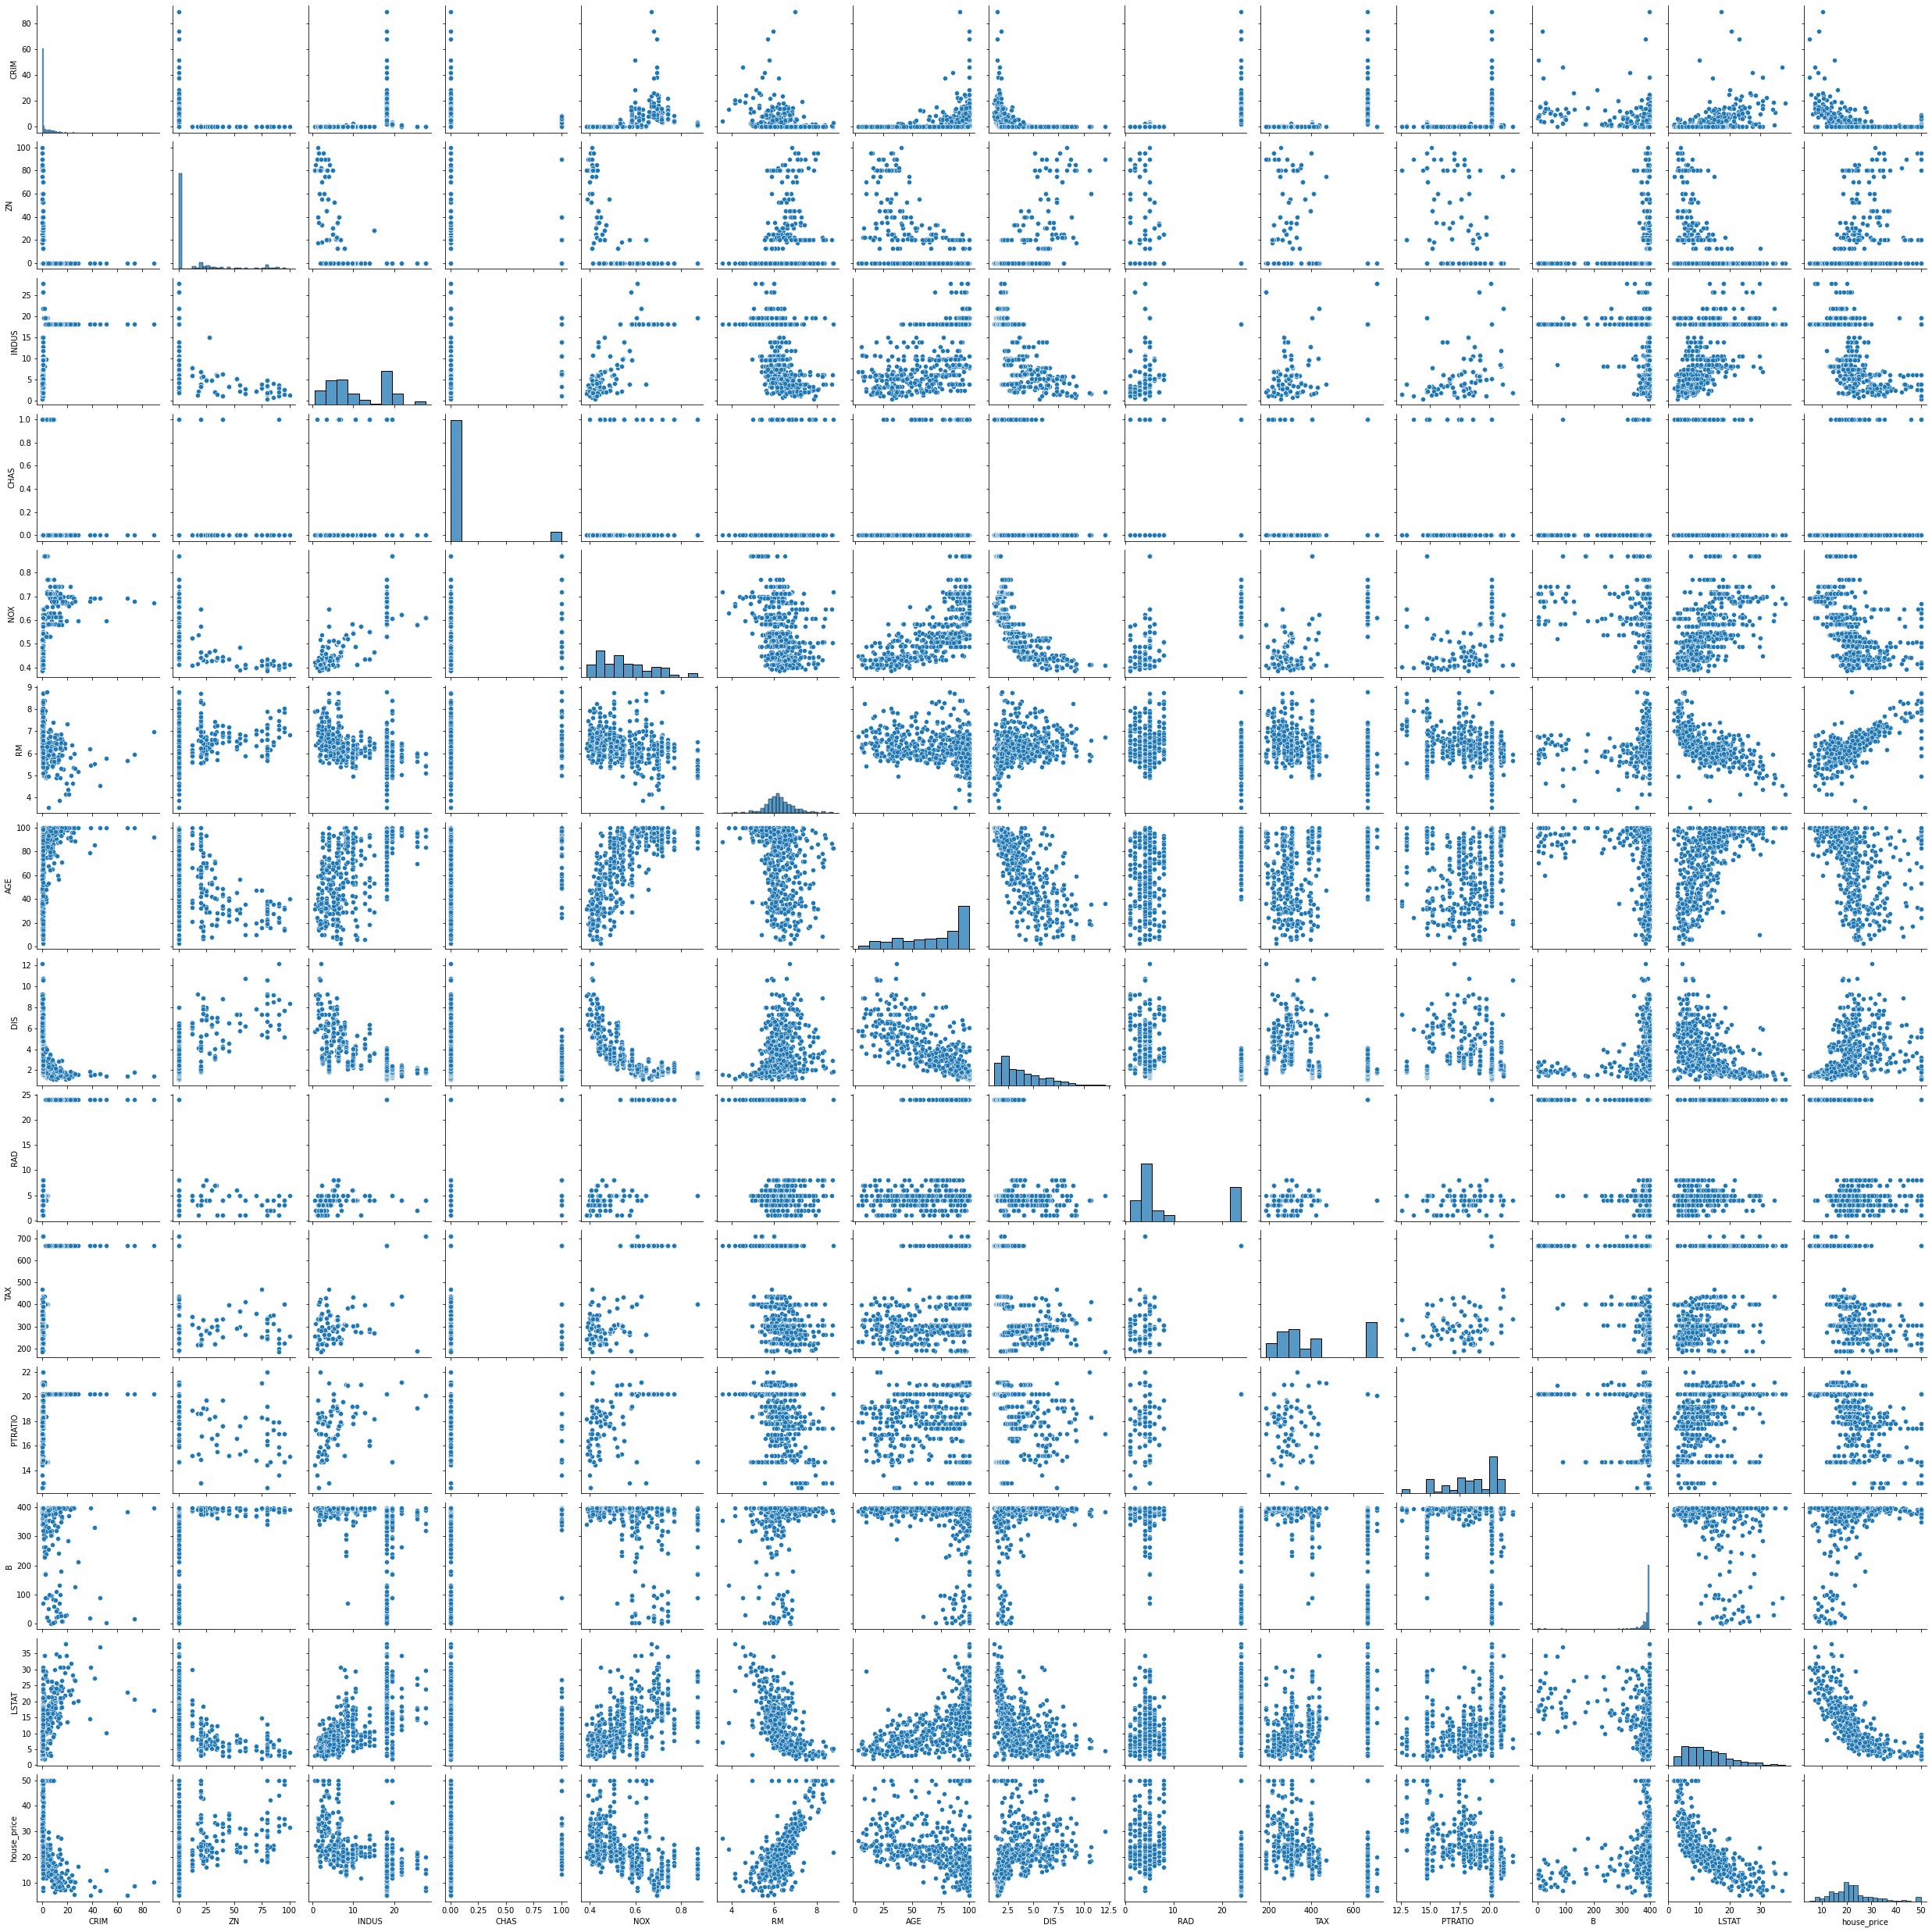

In [15]:
#it wll give the co-relation with respect to better understanding
import seaborn as sns
sns.pairplot(df)

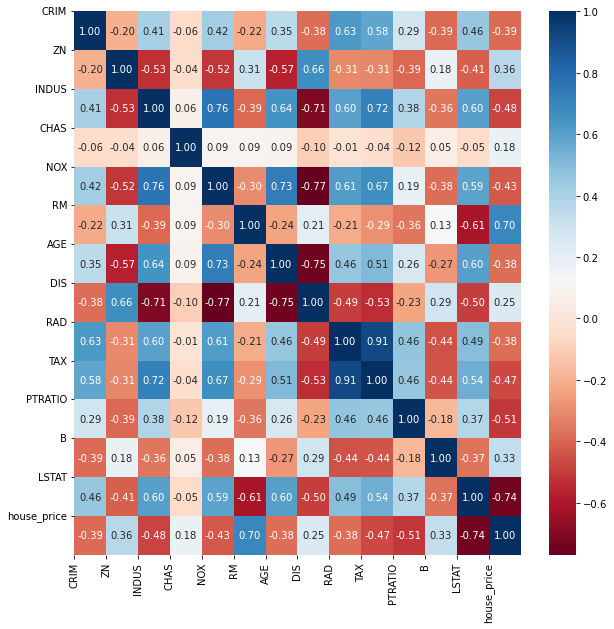

In [57]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

<AxesSubplot:xlabel='LSTAT', ylabel='house_price'>

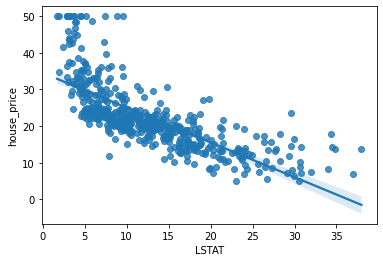

In [18]:
#we will see the linear reg for each feature with dependent feature how its correlated
sns.regplot(x="LSTAT",y="house_price",data=df)

<AxesSubplot:xlabel='CRIM', ylabel='house_price'>

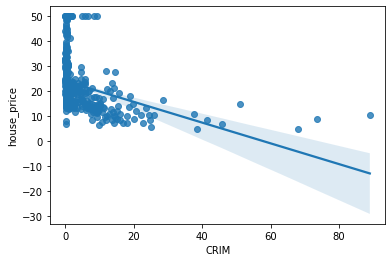

In [19]:
sns.regplot(x="CRIM",y="house_price",data=df)

<AxesSubplot:xlabel='TAX', ylabel='house_price'>

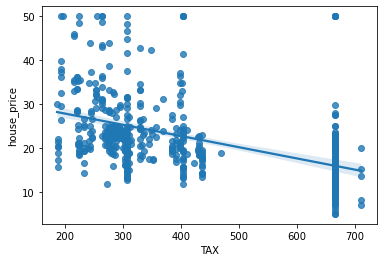

In [24]:
sns.regplot(x="TAX",y="house_price",data=df)

<AxesSubplot:xlabel='RM', ylabel='house_price'>

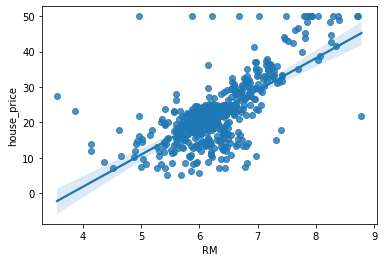

In [ ]:
sns.regplot(x="RM",y="house_price",data=df)

<AxesSubplot:xlabel='DIS', ylabel='house_price'>

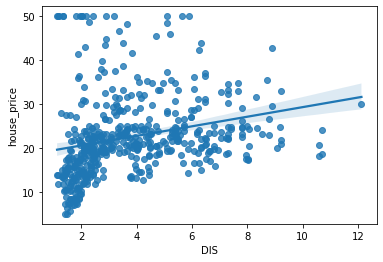

In [ ]:
sns.regplot(x="DIS",y="house_price",data=df)

<AxesSubplot:xlabel='PTRATIO', ylabel='house_price'>

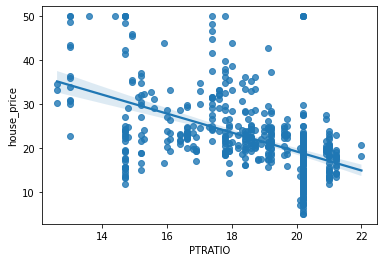

In [ ]:
sns.regplot(x="PTRATIO",y="house_price",data=df)

# Preparing the dataset for training

In [29]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: house_price, Length: 506, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [34]:
X_train.shape

(379, 13)

In [36]:
y_test.shape

(127,)

In [37]:
#Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
#we will feature all the feature values to same scale because in linear regression it will solve the graident descent problem
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
X_train

array([[-0.40679535, -0.50281197, -1.24707626, ..., -0.20515671,
         0.40451209, -1.07775629],
       [ 0.00799171, -0.50281197,  1.21828293, ..., -1.57625236,
        -3.09803734,  0.35116456],
       [-0.41344957,  0.36438137, -1.12179223, ..., -1.48779457,
         0.32659121, -1.22625199],
       ...,
       [-0.41595107,  2.96596138, -1.31187834, ..., -0.55898784,
         0.36812613, -0.91385066],
       [ 0.92638065, -0.50281197,  1.00515608, ...,  0.8563367 ,
        -2.84814129,  1.50690937],
       [-0.39020739, -0.50281197, -0.36864804, ...,  1.16593894,
        -3.29495634, -0.26383177]])

In [43]:
X_test

array([[-0.40670502, -0.50281197, -1.0181089 , ..., -0.73590341,
         0.42030222, -0.48657531],
       [-0.41096131,  1.23157471, -0.67825799, ..., -0.29361449,
         0.4363212 , -1.25847275],
       [-0.40502371, -0.50281197,  2.39336067, ...,  0.81210781,
         0.35862916,  0.77843992],
       ...,
       [-0.40071683, -0.50281197, -0.60625567, ..., -0.16092782,
         0.28150923, -0.93906691],
       [-0.37546815, -0.50281197, -0.5385735 , ...,  0.59096335,
         0.4363212 , -0.67429629],
       [-0.41550665,  3.18275972, -1.00370844, ..., -0.16092782,
         0.38517489, -0.86201726]])

# Model Training

In [48]:
#linear regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [49]:
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
print(regression.intercept_)

22.90791556728232


In [53]:
print(regression.coef_)

[-1.06546379  0.68154987  0.33928836  0.73726309 -1.93178062  3.14172655
 -0.25586276 -2.95561026  2.21416067 -1.65127265 -2.08714915  1.15235744
 -3.69504236]


In [54]:
reg_predict = regression.predict(X_test)

In [55]:
reg_predict

array([28.83885359, 36.00783288, 15.08324755, 25.23090886, 18.87864064,
       23.21398327, 17.5931124 , 14.30508093, 23.05438985, 20.62008346,
       24.78514683, 18.66833668, -6.9788951 , 21.83575737, 19.20898992,
       26.2868054 , 20.54379176,  5.65713224, 40.42358065, 17.64146116,
       27.32258958, 30.05056174, 11.15013704, 24.11530393, 17.89145648,
       15.79348591, 22.94743453, 14.2586068 , 22.26731194, 19.24709013,
       22.26897546, 25.24344002, 25.69165643, 17.98759507, 16.70286649,
       17.11631225, 31.19643534, 20.17835831, 23.71828436, 24.79196868,
       13.94575895, 32.00389982, 42.53869791, 17.44523722, 27.15354457,
       17.07482215, 13.89272021, 26.06440323, 20.36888769, 29.97813037,
       21.35346608, 34.32287916, 15.88498671, 26.17757739, 39.50970314,
       22.84123308, 18.95049088, 32.68913818, 25.02057949, 12.90539147,
       22.76052302, 30.53884316, 31.60797905, 15.92162168, 20.50670563,
       16.50798147, 20.50202198, 26.00723901, 30.63860954, 11.42

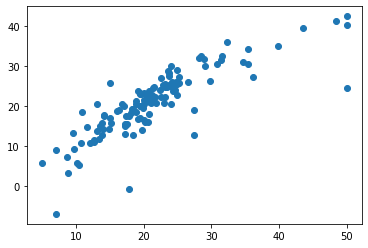

In [63]:
plt.scatter(y_test,reg_predict)

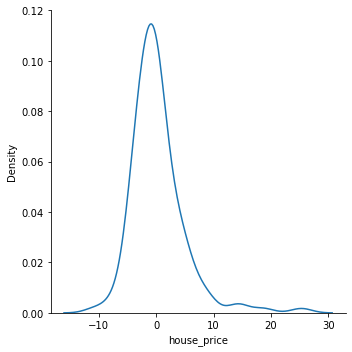

In [65]:
residuals=y_test-reg_predict
sns.displot(residuals,kind="kde")

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [70]:
cv_score_lr = cross_val_score(estimator = regression, X = X_train, y = y_train, cv = 10)

# Predict R2 Score the Train set results
y_pred_lr_train = regression.predict(X_train)
r2_score_lr_train = r2_score(y_train,y_pred_lr_train)

# Predict R2 Score the Test set results
y_pred_lr_test = regression.predict(X_test)
r2_score_lr_test = r2_score(y_test, y_pred_lr_test)

# Predict RMSE the Test set results
rmse_lr = (np.sqrt(mean_squared_error(y_test,y_pred_lr_test)))


print('CV: ', cv_score_lr.mean())
print('R2_score (train): ', r2_score_lr_train)
print('R2_score (test): ', r2_score_lr_test)
print("RMSE: ", rmse_lr)

CV:  0.7160133196648373
R2_score (train):  0.748087259862344
R2_score (test):  0.6844267283527131
RMSE:  4.700924890603761


In [72]:
#random forest

from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor_rf.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [75]:
# Predict Cross Validation Score
cv_score_rf = cross_val_score(estimator = regressor_rf, X = X_train, y = y_train.ravel(), cv = 10)

# Predict R2 Score the Train set results
y_pred_rf_train = regressor_rf.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

# Predict R2 Score the Test set results
y_pred_rf_test = regressor_rf.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

# Predict RMSE the Test set results
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('CV: ', cv_score_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.8424538189029999
R2_score (train):  0.9781679521493607
R2_score (test):  0.8511763556028424
RMSE:  3.228264971366868


In [60]:
#decision tree model
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [74]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Predic Cross Validation Score
cv_score_dt = cross_val_score(estimator = regressor_dt, X = X_train, y = y_train, cv = 10)

# Predict R2 Score the Train set results
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predict R2 Score the Test set results
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predict RMSE the Test set results
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

print('CV: ', cv_score_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.634896392042808
R2_score (train):  1.0
R2_score (test):  0.8428067360574599
RMSE:  3.3177997642399326


In [76]:
#random forest regressor gives the best results so we will take that for future webapp

import pickle
pickle.dump(regressor_rf,open('rfregmodel.pkl','wb'))
pickled_model=pickle.load(open('rfregmodel.pkl','rb'))